# ניתוח ציוני בחינות בגרות בישראל


מוטיבציה ומטרות:
בחינות הבגרות מתבצעות מדי שנה בתיכונים השונים בישראל. ציוני הבחינות מהווים מפתח לקבלה ללימודי תואר באוניברסיטאות ומכללות, ובעקבות כך אפשרות להיכנס לשוק העבודה. בפרויקט זה, נרצה לבדוק אילו קריטריונים משפיעים על הצלחה וכשלון בבחינות הבגרות. נבחן קריטריונים שונים בנוגע לבית הספר וכן את המצב הסוציואקונומי של האוכלוסייה הנבחנת. מטרתנו היא להיעזר במסקנות שנמצא על מנת למזער את הפערים בחברה ולאפשר לכל תלמיד הזדמנות שווה להצלחה בבחינות הבגרות.
ניצבים לפנינו שני קשיים עיקריים: מידע חסר רב (נתונים לא שלמים) וסוגי מידע שונים והיכולת לשלב ביניהם.

מקורות:

הנתונים נלקחו מתוך האתרים הבאים:

•	מידע לעם

•	שקיפות בחינוך

•	הלשכה המרכזית לסטטיסטיקה


הקוד:

In [348]:
import pandas as pd
import seaborn as sb
import requests
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as skl
from sklearn.cluster import KMeans
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [349]:
#משיכת טבלת פרטי בתי הספר
file_id='1wYTbFyhGgsSqut9Z5Ec1kj9q2X16Es2w'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_schools = pd.read_csv(csv_url)
df_schools

,semel,school,district,town,locality,sector,Inspection,wrong_notebooks,entitlement_to_bagrut,excellence_bagrut,...,num_of_classes,average_students _per _class,army_recruitment_men,army_recruitment_women,national_service_men,national_service_women,town_symbol,population,index_value,cluster_1_to_10
0,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,12,24.500000,NaN,NaN,0.118,0.176,472.0,6894.604873,-0.761583,3.0
1,248559,אבו-סלים סלמאן אלשיך,צפון,אבו סנאן,ABU SINAN,דרוזי,NaN,2.394314,62.9,7.1,...,20,28.850000,0.950,NaN,0.029,0.209,473.0,13357.669960,-0.752622,3.0
2,648220,תיכון אורט אבוקרינט,דרום,אבו קרינאת )יישוב(,ABU QUREINAT,בדואי,NaN,1.328502,42.0,0.9,...,15,27.400000,NaN,NaN,0.000,NaN,1342.0,1218.360192,-2.220970,1.0
3,440180,מקיף הדסים,חינוך התישבותי,אבן יהודה,EVEN YEHUDA,יהודי,ממלכתי,0.099502,88.2,16.2,...,32,27.250000,0.983,0.975,0.000,0.017,182.0,13125.224050,1.535259,8.0
4,640532,אולפנת אבן שמואל,חינוך התישבותי,אבן שמואל,EVEN SHEMU'EL,יהודי,NaN,0.097324,94.1,8.4,...,10,31.000000,NaN,0.044,NaN,0.971,400.0,1535.417540,-0.389875,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,770297,עירוני יד',תל אביב,תל אביב - יפו,TEL AVIV - YAFO,יהודי,ממלכתי,0.041051,94.3,7.2,...,16,33.562500,0.965,0.969,0.000,0.015,5000.0,431708.214600,1.207843,8.0
673,444034,נוה הדסה,חינוך התישבותי,תל יצחק,TEL YIZHAQ,יהודי,ממלכתי,0.274725,72.3,0.0,...,10,15.200000,0.976,NaN,0.000,NaN,287.0,949.501823,-0.207854,4.0
674,441279,"בית חינוך ע""ש רבין",מרכז,תל מונד,TEL MOND,יהודי,ממלכתי,0.000000,90.8,23.1,...,24,33.166667,0.992,0.984,0.015,0.000,154.0,11940.774210,1.403461,8.0
675,648089,מקיף עתיד אלביאן,דרום,תל שבע,TEL SHEVA,בדואי,ממלכתי,7.411067,32.2,0.0,...,10,23.400000,NaN,NaN,NaN,NaN,1054.0,18671.150540,-2.311876,1.0


In [350]:
#ציוני בגרות שנים 2013-2016
file_id='1KHS6VF4w4YE0npYcYvZSbrax2_pKO8YN'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_bagrut = pd.read_csv(csv_url)
df_bagrut

,semel,school,city,year,subject,grade,takers
0,120238,קרית יערים,קרית יערים)מוסד(,2013,english_3,NaN,8
1,120238,קרית יערים,קרית יערים)מוסד(,2013,math_3,NaN,6
2,120238,קרית יערים,קרית יערים)מוסד(,2013,ezrahut,NaN,5
3,120238,קרית יערים,קרית יערים)מוסד(,2013,history,NaN,5
4,120238,קרית יערים,קרית יערים)מוסד(,2013,bible,61.55,11
...,...,...,...,...,...,...,...
29217,900076,טכנולוגי תורני נחלים,נחלים,2015,math_3,54.79,14
29218,900076,טכנולוגי תורני נחלים,נחלים,2015,history,50.92,12
29219,900076,טכנולוגי תורני נחלים,נחלים,2016,safrut,NaN,7
29220,900076,טכנולוגי תורני נחלים,נחלים,2016,english_3,72.92,24


In [351]:
#הורדת בגרויות ללא ציון- עם פחות מ11 נבחנים
df_bagrut = df_bagrut.dropna(axis=0) #remove nulls
df_bagrut

,semel,school,city,year,subject,grade,takers
4,120238,קרית יערים,קרית יערים)מוסד(,2013,bible,61.55,11
10,120238,קרית יערים,קרית יערים)מוסד(,2014,bible,64.36,11
21,140012,אולפנא תורנית חורב,ירושלים,2013,english_4,87.41,17
22,140012,אולפנא תורנית חורב,ירושלים,2013,english_5,92.84,101
23,140012,אולפנא תורנית חורב,ירושלים,2013,math_3,94.87,31
...,...,...,...,...,...,...,...
29216,900076,טכנולוגי תורני נחלים,נחלים,2015,english_3,74.96,25
29217,900076,טכנולוגי תורני נחלים,נחלים,2015,math_3,54.79,14
29218,900076,טכנולוגי תורני נחלים,נחלים,2015,history,50.92,12
29220,900076,טכנולוגי תורני נחלים,נחלים,2016,english_3,72.92,24


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


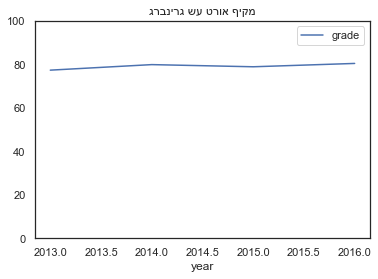

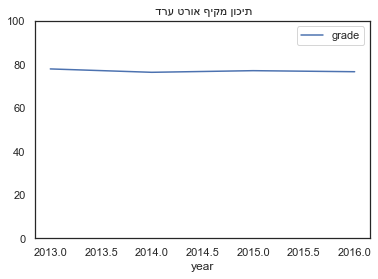

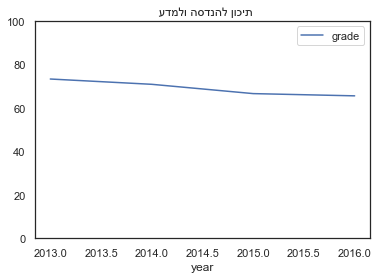

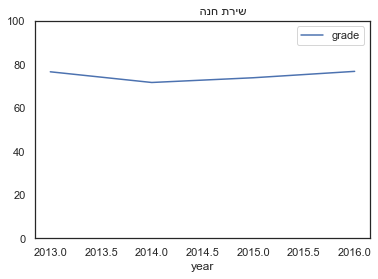

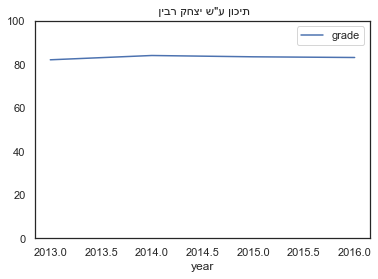

In [352]:
# ננסה לראות שינויים בין שנים שונות לפי בית ספר בבדיקה אקראית של בתי ספר
store_data = pd.DataFrame()
def reverse_city(value):
    return value[::-1]
df_bagrut['reverse_school'] =  df_bagrut['school'].apply(reverse_city)
unique_schools = df_bagrut['school'].unique()#

def gen_chart():
    random_school = random.choices(unique_schools,k=1)[0]
    school_data = df_bagrut[df_bagrut['school'] == random_school].groupby(['year']).mean().reset_index()
    print(school_data.plot.line(x='year', y='grade',ylim=(0,100),title=random_school[::-1],figsize=(6,4)))
    return df_bagrut[df_bagrut['school'] == random_school]


for _ in range(5):
    school_data = gen_chart()
    store_data = store_data.append(school_data)

In [353]:
#איחוד עם טבלת  ציוני הבגרות
df = df_schools.merge(df_bagrut, on=["semel","school"])
df.head()

,semel,school,district,town,locality,sector,Inspection,wrong_notebooks,entitlement_to_bagrut,excellence_bagrut,...,town_symbol,population,index_value,cluster_1_to_10,city,year,subject,grade,takers,reverse_school
0,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,472.0,6894.604873,-0.761583,3.0,אבו גוש,2013,english_3,65.81,32,שוג ובא ףיקמ
1,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,472.0,6894.604873,-0.761583,3.0,אבו גוש,2013,english_4,77.06,36,שוג ובא ףיקמ
2,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,472.0,6894.604873,-0.761583,3.0,אבו גוש,2013,english_5,86.42,12,שוג ובא ףיקמ
3,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,472.0,6894.604873,-0.761583,3.0,אבו גוש,2013,math_3,70.98,41,שוג ובא ףיקמ
4,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,472.0,6894.604873,-0.761583,3.0,אבו גוש,2013,math_4,82.26,23,שוג ובא ףיקמ


In [354]:
new_df=df
df=df.set_index(["semel","subject"])
#אינדקסים לפי עיר, בית ספר ומקצוע
#השמטת עמודות לא רלוונטיות-עיר בעברית ואחוז תלמידים במסלול טכנולוגי
df = df.drop(['city', 'students_in_technology_education', 'reverse_school'], axis=1)
df


school district                  town  \
semel  subject                                                          
148080 english_3  מקיף אבו גוש          ירושלים  אבו גוש                
       english_4  מקיף אבו גוש          ירושלים  אבו גוש                
       english_5  מקיף אבו גוש          ירושלים  אבו גוש                
       math_3     מקיף אבו גוש          ירושלים  אבו גוש                
       math_4     מקיף אבו גוש          ירושלים  אבו גוש                
...                                ...      ...                   ...   
800144 english_3  מקיף עמל תל שבע א'       דרום  תל שבע                 
       english_4  מקיף עמל תל שבע א'       דרום  תל שבע                 
       history    מקיף עמל תל שבע א'       דרום  תל שבע                 
       math_3     מקיף עמל תל שבע א'       דרום  תל שבע                 
       math_4     מקיף עמל תל שבע א'       דרום  תל שבע                 

                   locality sector Inspection  wrong_notebooks  \
semel  subject                                                   
148080 english_3  ABU GHOSH   ערבי     ממלכתי         2.686109   
       english_4  ABU GHOSH   ערבי     ממלכתי         2.686109   
       english_5  ABU GHOSH   ערבי     ממלכתי         2.686109   
       math_3     ABU GHOSH   ערבי     ממלכתי         2.686109   
       math_4     ABU GHOSH   ערבי     ממלכתי         2.686109   
...                     ...    ...        ...              ...   
800144 english_3  TEL SHEVA  בדואי     ממלכתי         8.564593   
       english_4  TEL SHEVA  בדואי     ממלכתי         8.564593   
       history    TEL SHEVA  בדואי     ממלכתי         8.564593   
       math_3     TEL SHEVA  בדואי     ממלכתי         8.564593   
       math_4     TEL SHEVA  בדואי     ממלכתי         8.564593   

                  entitlement_to_bagrut  excellence_bagrut  \
semel  subject                                               
148080 english_3                   59.8                0.0   
       english_4                   59.8                0.0   
       english_5                   59.8                0.0   
       math_3                      59.8                0.0   
       math_4                      59.8                0.0   
...                                 ...                ...   
800144 english_3                   42.0                0.0   
       english_4                   42.0                0.0   
       history                     42.0                0.0   
       math_3                      42.0                0.0   
       math_4                      42.0                0.0   

                  median_seniority_teaching  ...  army_recruitment_women  \
semel  subject                               ...                           
148080 english_3                       12.0  ...                     NaN   
       english_4                       12.0  ...                     NaN   
       english_5                       12.0  ...                     NaN   
       math_3                          12.0  ...                     NaN   
       math_4                          12.0  ...                     NaN   
...                                     ...  ...                     ...   
800144 english_3                        4.0  ...                     NaN   
       english_4                        4.0  ...                     NaN   
       history                          4.0  ...                     NaN   
       math_3                           4.0  ...                     NaN   
       math_4                           4.0  ...                     NaN   

                  national_service_men  national_service_women  town_symbol  \
semel  subject                                                                
148080 english_3                 0.118                   0.176        472.0   
       english_4                 0.118                   0.176        472.0   
       english_5                 0.118                   0.176        472.0   
       math_3                   

פירוט העמודות בטבלה, המשמשות קריטריונים להשוואה. נבחן את השפעתם על ציוני בחינות הבגרות:

'semel' סמל המוסד

'school' שם בית הספר

'subject' מקצוע לימוד. במקצועות מתמטיקה ואנגלית, מצוין מספר יחידות הלימוד

'wrong_notebooks' שיעור מחברות בחינה פסולות

'entitlement_to_bagrut' אחוז זכאות לבגרות

'excellence_bagrut' אחוז זכאות לבגרות בהצטיינות

'median_seniority_teaching' חציון ותק הוראה של המורים

'Num_of_teachers' מספר המורים בבית הספר

'teachers_with_masters_degree' שיעור המורים בעלי תואר שני ומעלה

'exams_respectively' אחוז התאמות

'persistence' אחוז התמדה

'dropout_of_school' אחוז נשירה

'num_of_students' מספר תלמידים בבית הספר

'num_of_classes' מספר כיתות בבית הספר

'average_students _per _class' ממוצע תלמידים בכיתה

'army_recruitment_men' אחוזי גיוס גברים

'army_recruitment_women' אחוזי גיוס נשים

'national_service_men' אחוזי התנדבות לשירות לאומי גברים

'national_service_women' אחוזי התנדבות לשירות לאומי נשים

'town_symbol' סמל העיר

'population' אוכלוסיה

'index_value ' אינדקס המודד מצב סוציואקונומי

'cluster_1_to_10' מדד סוציו אקונומי נוסף. ערכים בין 1 ל10

'grade' ממוצע ציונים בבחינה

'takers' מספר נבחנים בבחינה

חלוקת ציונים כוללת

count    20373.000000
mean        78.387233
std          7.448822
min         40.410000
25%         73.330000
50%         78.480000
75%         83.920000
max         98.800000
Name: grade, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


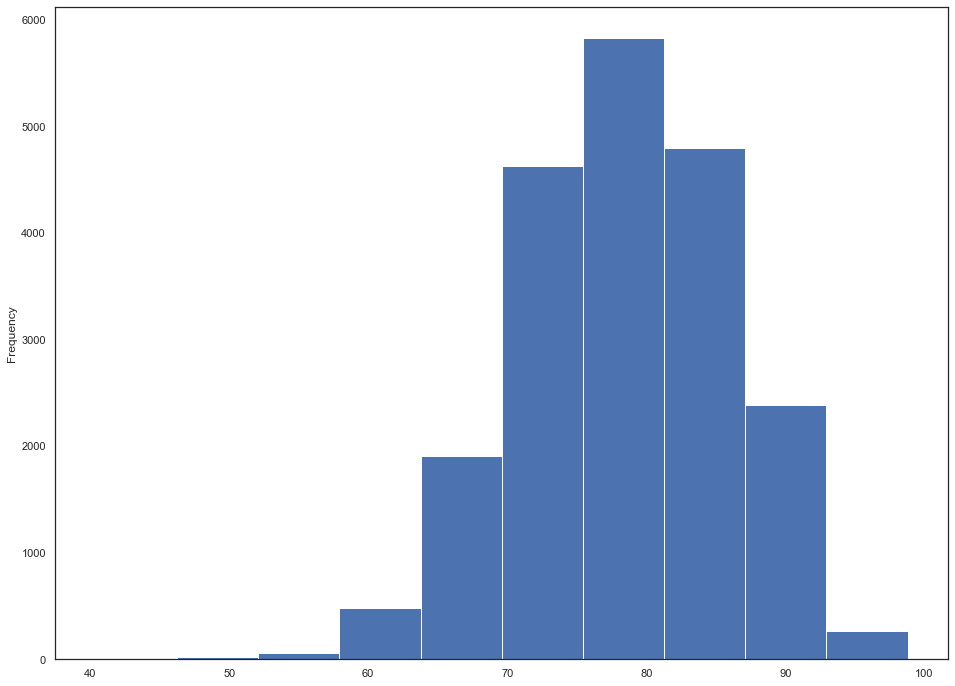

In [355]:
print(df['grade'].describe())
print(df.grade.plot.hist(figsize=(16,12)))

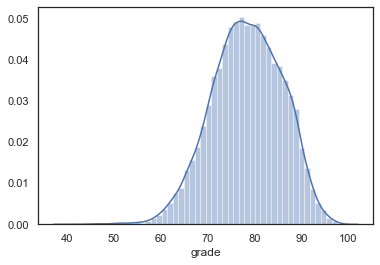

In [356]:
sb.distplot(df.grade)

semel   subject  
148080  english_3    12.577233
        english_4     1.327233
        english_5    -8.032767
        math_3        7.407233
        math_4       -3.872767
                       ...    
800144  english_3    12.477233
        english_4     6.847233
        history       9.887233
        math_3       10.787233
        math_4        7.387233
Name: grade, Length: 20373, dtype: float64


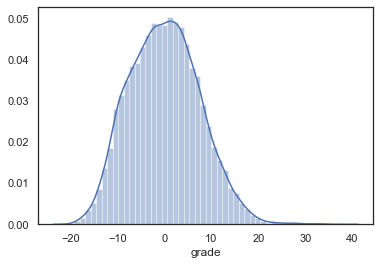

In [357]:
mean_grade = df.mean().get("grade")
mean_grade
print(mean_grade-df.grade)
sb.distplot(mean_grade-df.grade)

נוסיף עמודה של ציונים מעל 70, ננסה לראות האם ישנה חוקיות לגבי ציון גבוה או נמוך יותר.

In [358]:
df['over-70']=(df['grade']>70)


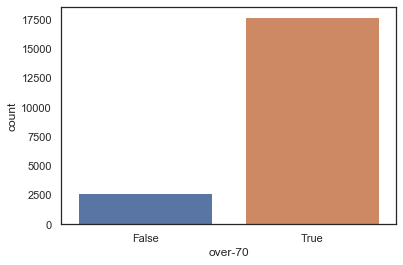

In [359]:
sb.countplot(df['over-70'], label="Count")

In [360]:
df = df.dropna(axis=0) #remove nulls
df = df.drop(['town', 'school', 'district', 'locality', 'sector', 'Inspection'], axis=1)
classes = df['over-70']                
df

wrong_notebooks  entitlement_to_bagrut  excellence_bagrut  \
semel  subject                                                                
440180 english_3         0.099502                   88.2               16.2   
       english_4         0.099502                   88.2               16.2   
       english_5         0.099502                   88.2               16.2   
       math_3            0.099502                   88.2               16.2   
       math_4            0.099502                   88.2               16.2   
...                           ...                    ...                ...   
441279 history           0.000000                   90.8               23.1   
       math_3            0.000000                   90.8               23.1   
       math_4            0.000000                   90.8               23.1   
       math_5            0.000000                   90.8               23.1   
       bible             0.000000                   90.8               23.1   

                  median_seniority_teaching  Num_of_teachers  \
semel  subject                                                 
440180 english_3                       19.0              161   
       english_4                       19.0              161   
       english_5                       19.0              161   
       math_3                          19.0              161   
       math_4                          19.0              161   
...                                     ...              ...   
441279 history                         21.0              149   
       math_3                          21.0              149   
       math_4                          21.0              149   
       math_5                          21.0              149   
       bible                           21.0              149   

                  teachers_with_masters_degree  exams_respectively  \
semel  subject                                                       
440180 english_3                      0.465839            0.697368   
       english_4                      0.465839            0.697368   
       english_5                      0.465839            0.697368   
       math_3                         0.465839            0.697368   
       math_4                         0.465839            0.697368   
...                                        ...                 ...   
441279 history                        0.550336            0.833856   
       math_3                         0.550336            0.833856   
       math_4                         0.550336            0.833856   
       math_5                         0.550336            0.833856   
       bible                          0.550336            0.833856   

                  persistence    dropout_of_school  num_of_students  ...  \
semel  subject                                                       ...   
440180 english_3       0.920097           0.005155              872  ...   
       english_4       0.920097           0.005155              872  ...   
       english_5       0.920097           0.005155              872  ...   
       math_3          0.920097           0.005155              872  ...   
       math_4          0.920097           0.005155              872  ...   
...                         ...                ...              ...  ...   
441279 history         0.915989           0.006234              796  ...   
       math_3          0.915989           0.006234              796  ...   
       math_4          0.915989           0.006234              796  ...   
       math_5          0.915989           0.006234              796  ...   
       bible           0.915989           0.006234              796  ...   

                  national_service_men  national_service_women  town_symbol  \
semel  subject                                                                
440180 english_3                 0.000                   0.017        182.0   
       english_4    

נרמול הנתונים

In [361]:
features = df
features = ((features - features.mean()) / features.std())
data = features
data

wrong_notebooks  entitlement_to_bagrut  excellence_bagrut  \
semel  subject                                                                
440180 english_3        -0.621397               0.343757           0.608304   
       english_4        -0.621397               0.343757           0.608304   
       english_5        -0.621397               0.343757           0.608304   
       math_3           -0.621397               0.343757           0.608304   
       math_4           -0.621397               0.343757           0.608304   
...                           ...                    ...                ...   
441279 history          -0.950833               0.595918           1.274425   
       math_3           -0.950833               0.595918           1.274425   
       math_4           -0.950833               0.595918           1.274425   
       math_5           -0.950833               0.595918           1.274425   
       bible            -0.950833               0.595918           1.274425   

                  median_seniority_teaching  Num_of_teachers  \
semel  subject                                                 
440180 english_3                  -0.029045         1.477690   
       english_4                  -0.029045         1.477690   
       english_5                  -0.029045         1.477690   
       math_3                     -0.029045         1.477690   
       math_4                     -0.029045         1.477690   
...                                     ...              ...   
441279 history                     0.502235         1.136806   
       math_3                      0.502235         1.136806   
       math_4                      0.502235         1.136806   
       math_5                      0.502235         1.136806   
       bible                       0.502235         1.136806   

                  teachers_with_masters_degree  exams_respectively  \
semel  subject                                                       
440180 english_3                     -0.844793            1.515242   
       english_4                     -0.844793            1.515242   
       english_5                     -0.844793            1.515242   
       math_3                        -0.844793            1.515242   
       math_4                        -0.844793            1.515242   
...                                        ...                 ...   
441279 history                        0.353553            2.616544   
       math_3                         0.353553            2.616544   
       math_4                         0.353553            2.616544   
       math_5                         0.353553            2.616544   
       bible                          0.353553            2.616544   

                  persistence    dropout_of_school  num_of_students  ...  \
semel  subject                                                       ...   
440180 english_3       0.749820          -0.307060         1.233737  ...   
       english_4       0.749820          -0.307060         1.233737  ...   
       english_5       0.749820          -0.307060         1.233737  ...   
       math_3          0.749820          -0.307060         1.233737  ...   
       math_4          0.749820          -0.307060         1.233737  ...   
...                         ...                ...              ...  ...   
441279 history         0.711635          -0.187426         0.925204  ...   
       math_3          0.711635          -0.187426         0.925204  ...   
       math_4          0.711635          -0.187426         0.925204  ...   
       math_5          0.711635          -0.187426         0.925204  ...   
       bible           0.711635          -0.187426         0.925204  ...   

                  national_service_men  national_service_women  town_symbol  \
semel  subject                                                                
440180 english_3             -0.634002               -0.475895    -1.168548   
       english_4    

ביצענו מספר ויזואליזציות למציאת נתונים רלוונטים, להרבה מהניסיונות לא הייתה משמעות מעניינת לכן השמטנו אותם.


נתחיל הנצגת ויזואליזציית כינור:

נחפש קריטריונים מתאימים לקטלוג, בעזרת ויזואליזצית כינור. נראה שהויזואליזציה לא מחדשת לנו. נראה מספר דוגמאות לכך:

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

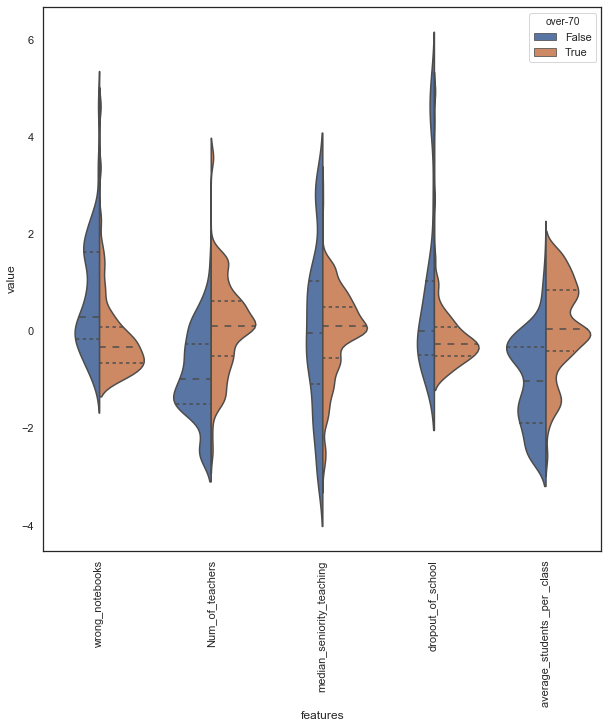

In [362]:
data = pd.concat([df['over-70'], features.iloc[:,[0,4,3,8,11]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,10))
sb.violinplot(x="features", y="value", hue="over-70", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

נעבור לויזואליזצית נחיל:

נציג מספר קבוצות:
1. נתוני מורים-3 קריטריונים
2. נתוני תלמידים-3 קריטריונים
3. השוואה בין 2 מדדים שונים של מצב סוציואקונומי
.ניתן לראות קשר בין דירוג המצב הסוציואקונימו (לפי מדד מ1 עד 10) לבין ממוצע ציוני הבגרות.

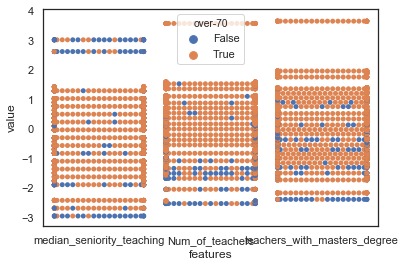

In [363]:
data = pd.concat([df['over-70'], features.iloc[:,[3,4,5]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="over-70", data=data)

ניתן לראות שמספר המורים ורמת ההשכלה שלהם משפיעים על ציוני התלמידים

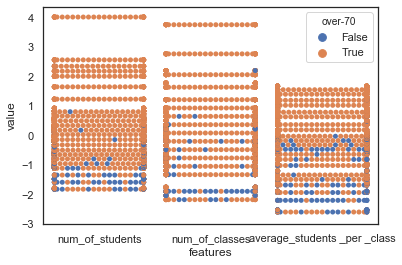

In [364]:
data = pd.concat([df['over-70'], features.iloc[:,[9,10,11]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="over-70", data=data)

עובדה מעניינת- ככל שיש יותר תלמידים בבית הספר, כך הציונים גבוהים יותר. כנל בנוגע למספר הכיתות ולממוצע סטודנטים בכיתה- להלן

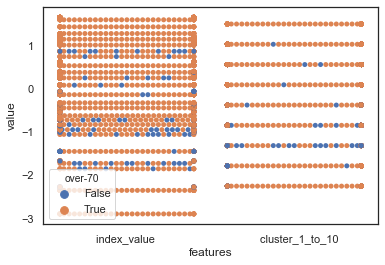

In [365]:
data = pd.concat([df['over-70'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="over-70", data=data)

ויזואליזצית פקטור:

כעת, נחלק את הנתונים ל4 קבוצות מעניינות:

1. נתונים על מורים-2 קריטריונים
2. נתונים על תלמידים-4 קריטריונים
3. השוואה בין שירות וגיוס של בנות לבין בנים. אצל בנות אפשר לראות שיש קשר בין סוג השירות לציון
4. השוואה בין 2 המדדים של המצב הסוציואקונומי. ניתן לראות קשר בין המצב הסוציואקונומי לבין הציונים


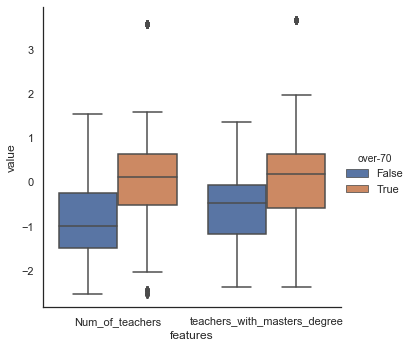

In [366]:
data = pd.concat([df['over-70'], features.iloc[:,4:6]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

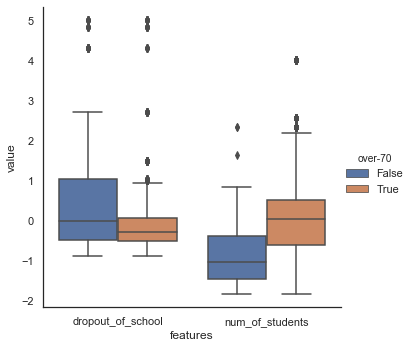

In [367]:
data = pd.concat([df['over-70'], features.iloc[:,[8,9]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

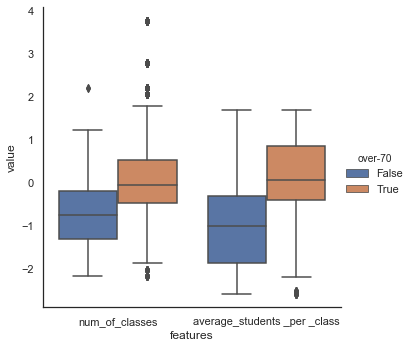

In [368]:
data = pd.concat([df['over-70'], features.iloc[:,10:12]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

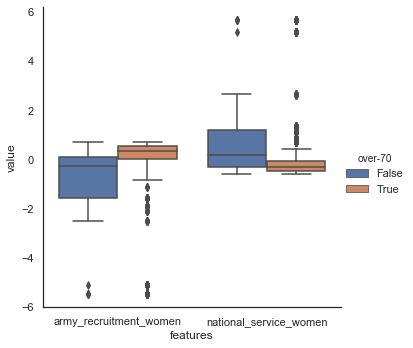

In [369]:
data = pd.concat([df['over-70'], features.iloc[:,[13,15]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

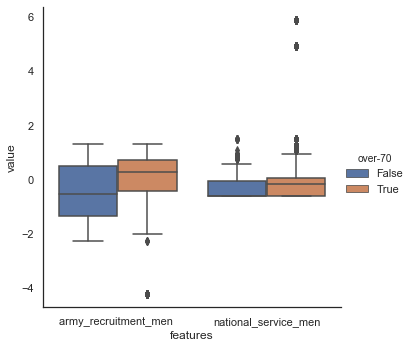

In [370]:
data = pd.concat([df['over-70'], features.iloc[:,[12,14]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

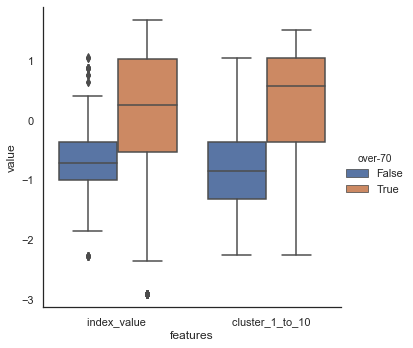

In [371]:
data = pd.concat([df['over-70'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

נסיון נוסף לניתוח הנתונים בצורה מדויקת יותר:

ננסה לחלק את הציונים לקבוצות לפי עשרות ונראה האם נזהה שינויים

החלוקה תתבצע כך:

60-70 =>6

70-80 =>7

80-90 =>8

90-100 =>9

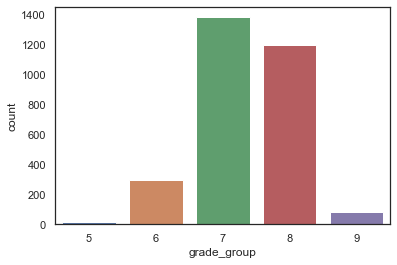

In [372]:
#חלוקת הציונים לקבוצות 

df["grade_group"]=df["grade"]/10
df["grade_group"]=df["grade_group"].astype(int)
df["grade_group"]
classes = classes = df['grade_group']
sb.countplot(df['grade_group'], label="Count")

ננסה כעת שוב את ויזואליזציית הנחיל. אין הרבה חידוש

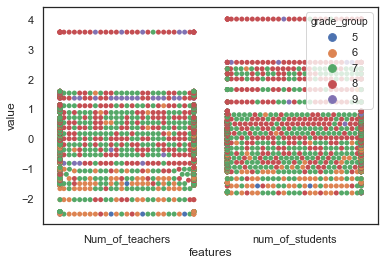

In [373]:
data = pd.concat([df['grade_group'], features.iloc[:,[4,9]]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="grade_group", data=data)

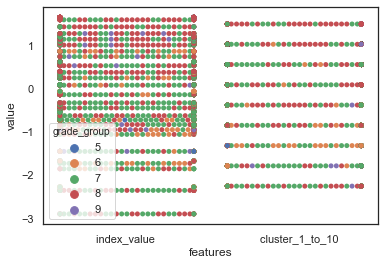

In [374]:
data = pd.concat([df['grade_group'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="grade_group", data=data)

גם בויזואליזציית פקטור, לא מצאנו חידוש גדול, אלא חיזוק לממצאים שהוצגו קודם לכן:

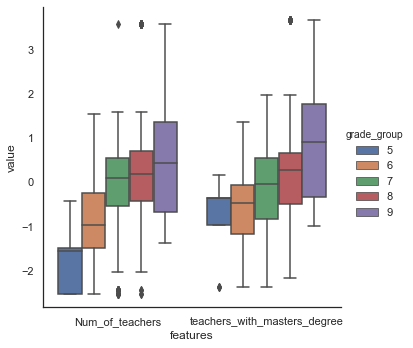

In [375]:
data = pd.concat([df['grade_group'], features.iloc[:,4:6]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

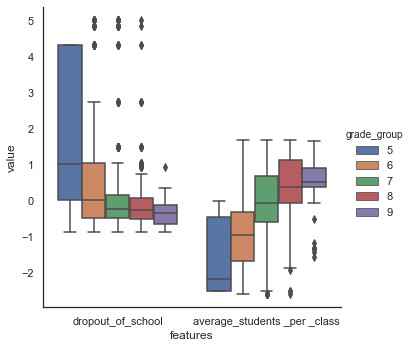

In [376]:
data = pd.concat([df['grade_group'], features.iloc[:,[8,11]]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

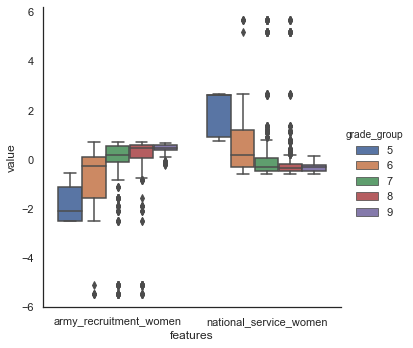

In [377]:
data = pd.concat([df['grade_group'], features.iloc[:,[13,15]]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

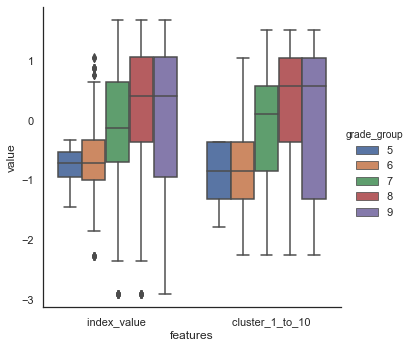

In [378]:
data = pd.concat([df['grade_group'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

In [379]:
df=df.drop(['year'], axis=1)

הצגת הנתונים במפת חום: ניתן לראות במפה קשר גבוה בין 2 מדדי המצב הסוציואקונומי ולכן בהמשך נשקול לצרפם.

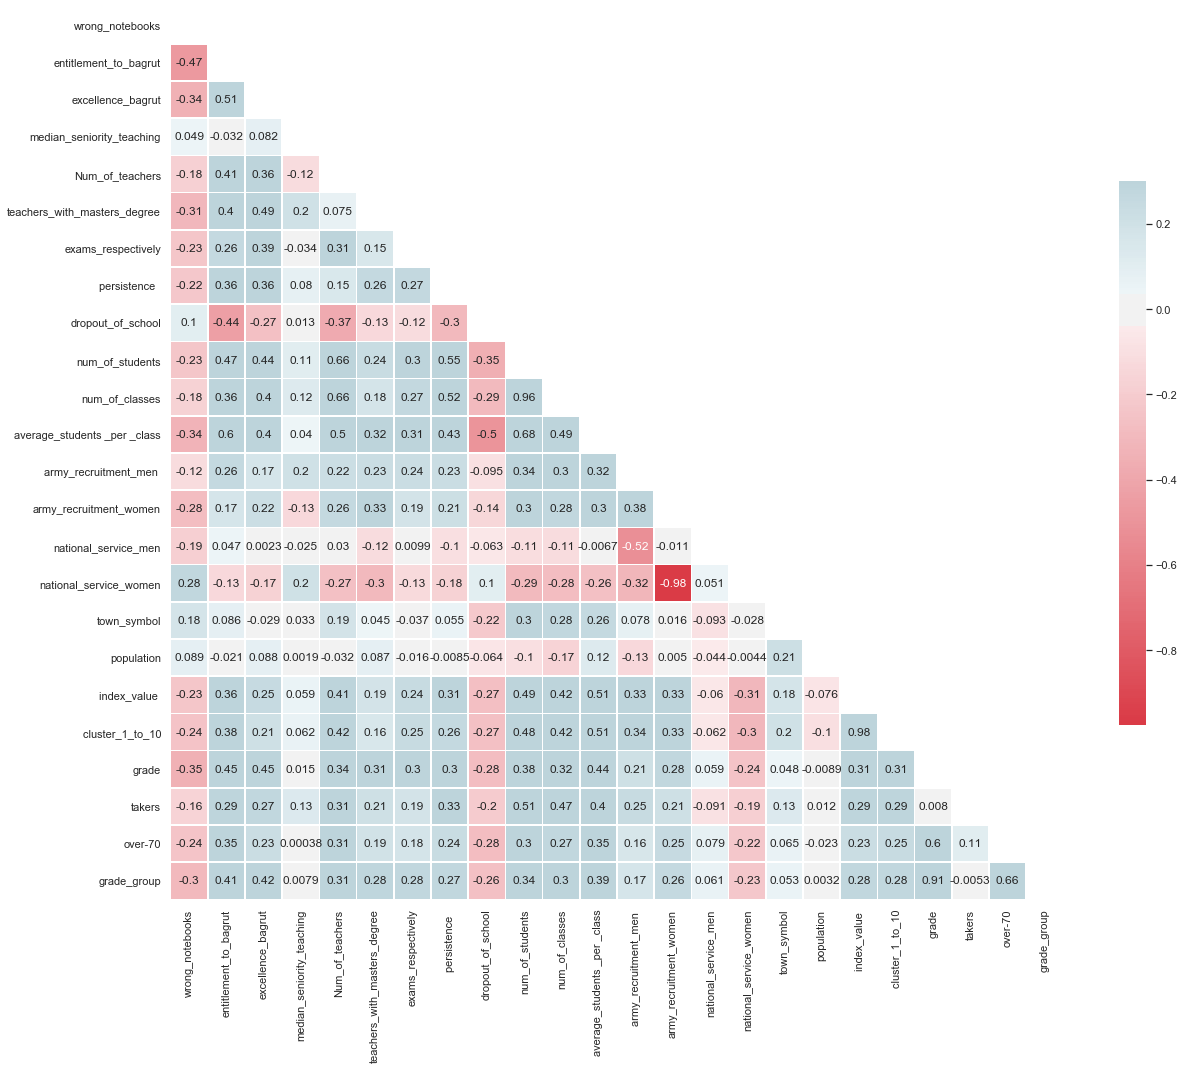

In [380]:
sb.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sb.diverging_palette(10, 220, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .5},annot=True)

עד כה לא הצחנו למצוא גורמים בעל קשר מובהק לציון, היו מספר גורמים שנראים בעלי השפעה קלה כמו מספר התלמידים בכיתה, ממוצע התלמידים בכיתה, מספר המורים בבית הספר והמדד הסוציואקונומי. 
ננסה לבדוק שילובי נתונים שונים ולראות את ההשפעה שלהם אחד על השני או על הציון הסופי. 
אנו מאמינים כי לא נמצא משהו מובהק יותר ונאלץ לחפש מידע נוסף לגבי הבגרויות עצמן, לגבי בתי הספר או נתונים לגבי הישובים.


ננסה להשתמש במספר אלגוריתמים ללמידה בלתי מפוקחת על מנת למצוא תוצאות מעניינות יותר:

Text(0, 0.5, 'index value')

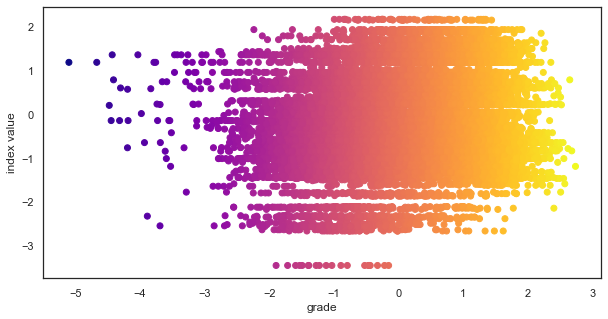

In [381]:
new_df=new_df.set_index(["semel"])
new_df=new_df.drop(['reverse_school','school', 'district', 'town', 'locality', 'sector','Inspection', 'city', 'subject'], axis=1)
features = new_df
features = ((features - features.mean()) / features.std())
data = features

plt.figure(figsize=(10,5))
plt.scatter(data['grade'],data['index_value '],c=data['grade'],cmap='plasma')
plt.xlabel("grade")
plt.ylabel("index value")

אלגוריתם k-mean

נבחן האם ישנו קשר בין הציון לבין המצב הסוציואקונומי בעזרתם האלגוריתם.

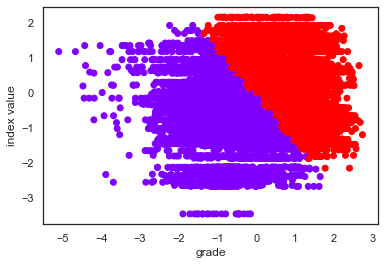

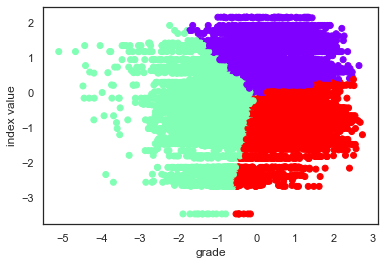

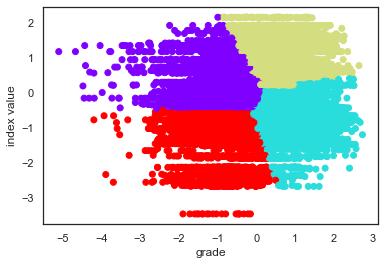

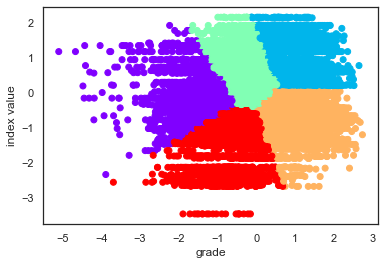

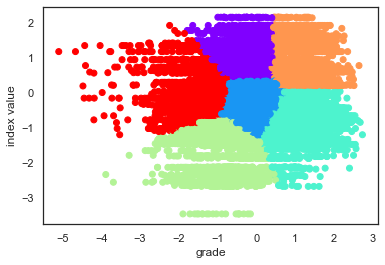

In [382]:
X = data[["grade","index_value "]]
X=X.dropna(axis=0)
i=2
while i<7:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    plt.scatter(X["grade"],X["index_value "], c=kmeans.labels_, cmap='rainbow')
    plt.xlabel("grade")
    plt.ylabel("index value")
    plt.show()
    i=i+1

###### ניתן לראות שהתקבלה חלוקה ל6 אזורים, לפי ציונים ומצב סוציואקונומי.
ניסינו להריץ את האלגוריתם גם על קריטריונים נוספים. התוצאות דומות.
אין חלוקה היוצרת תמונת מצב מעניינת.

In [401]:
new_table = new_df

In [402]:
new_table = new_table.drop(['exams_respectively','persistence  ', 'dropout_of_school','army_recruitment_men ', 'army_recruitment_women',
       'national_service_men', 'national_service_women','year','town_symbol'], axis=1)
new_table = new_table.dropna()

ננסה לבצע רגרסיה לינארית

In [403]:
model = LinearRegression()
x = np.array(new_table.T.loc[['Num_of_teachers','average_students _per _class']]).T
y = np.array(new_table.T.loc['grade']).T

In [404]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [405]:
model.score(x,y)

0.1106056954078326

ניתן לראות שההתאמה נמוכה מאוד. נראה גם ויזואליזציה של הרגרסיה:

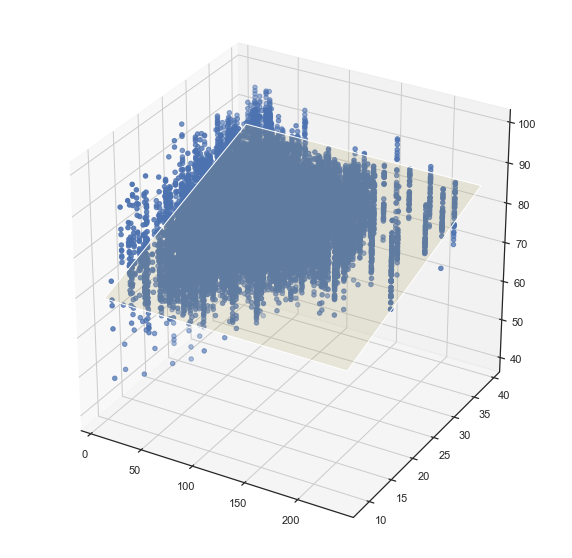

In [406]:
grid_range = np.vstack([x.min(axis=0), x.max(axis=0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

x_grid = np.c_[grid[0].ravel(),grid[1].ravel()]
y_grid = model.predict(x_grid).reshape(grid[0].shape)

fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x[:,0], x[:,1], y)
ax.plot_surface(grid[0], grid[1], y_grid, color="y", alpha=0.2)

לאחר נסיונות עם שילובי נתונים שונים, התוצאות נשארות גרועות. בהמשך ננסה סוגי רגרסיה שונים, למרות שאנו סקפטים גם לגבי ההצלחה שלהם.


לסיכום ביניים, חקרנו קריטריונים שונים על מנת למצוא גורמים המשפיעים על ציוני הבגרות בישראל. הצגנו ויזואליזציות שונות וכן שימוש באלגוריתמים. בינתיים, לא מצאנו תוצאות מעניינות המספקות אותנו. ראינו שקיים קשר כלשהו בין הציונים לבין חלק מהקריטריונים אך קשר זה אינו מספיק חזק.
לאור האמור, אנו חושבים לשנות מעט את הכיוון של הפרויקט. ייתכן והשימוש במידע לגבי כל הבגרויות הינו רחב מדי ולכן ננסה לבחון כל מקצוע בנפרד ולבדוק האם ניתן למצוא גורמי הצלחה במקצועות מסוימים שאינם משפיעים על מקצועות אחרים. נבחן את מקצועות הליבה הבאים: אנגלית (בדגש על חלוקה ליחידות הלימוד השונות), מתמטיקה (כנ"ל), ספרות, אזרחות, תנ"ך והיסטוריה.
אנו מקווים שלאחר הדיוק הזה נוכל למצוא תוצאות מעניינות ויעילות.